<a href="https://colab.research.google.com/github/tpenanen/Laptop-Price-Project/blob/main/Result_analysis(without_pipeline).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [85]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.metrics import f1_score
from google.colab import drive
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import root_mean_squared_error
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn import metrics
drive.mount('/content/drive')

data = pd.read_csv('/content/drive/MyDrive/laptop_price.csv', encoding = 'latin1')
data.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros,Price_usd
0,6,Acer,Aspire 3,Notebook,15.6,1366x768,AMD A9-Series 9420 3GHz,4GB,500GB HDD,AMD Radeon R5,Windows 10,2.1kg,400.0,436.7600
1,10,Acer,Swift 3,Ultrabook,14.0,IPS Panel Full HD 1920x1080,Intel Core i5 8250U 1.6GHz,8GB,256GB SSD,Intel UHD Graphics 620,Windows 10,1.6kg,770.0,840.7630
2,37,Acer,Aspire 3,Notebook,15.6,1366x768,Intel Core i3 7130U 2.7GHz,4GB,1TB HDD,Intel HD Graphics 620,Linux,2.1kg,367.0,400.7273
3,44,Acer,Aspire A515-51G,Notebook,15.6,IPS Panel Full HD 1920x1080,Intel Core i5 8250U 1.6GHz,4GB,256GB SSD,Intel UHD Graphics 620,Windows 10,2.2kg,682.0,744.6758
4,52,Acer,Aspire A515-51G,Notebook,15.6,IPS Panel Full HD 1920x1080,Intel Core i7 8550U 1.8GHz,8GB,256GB SSD,Nvidia GeForce MX150,Windows 10,2.2kg,841.0,918.2879


In [86]:
print(data["Company"].unique())
name = data["Company"]
Company_names = []
Acer_count = Apple_count=Asus_count=Chuwi_count = Dell_count = Fujitsu_count= Google_count = HP_count = Huawei_count = Lenovo_count = LG_count = Media_count = Microsoft_count=0
Msi_count = razer_count = samsung_count = toshi_count = vero_count = Xiaomi_count = 0
for c in name:
  c = c.strip()
  if c == "Acer":
    Acer_count+=1
    Company_names.append("Acer")
  if c == "Apple":
    Apple_count+=1
    Company_names.append("Apple")
  if c == "Asus":
    Asus_count+=1
    Company_names.append("Asus")
  if c == "Chuwi":
    Chuwi_count+=1
    Company_names.append("Chuwi")
  if c == "Dell":
    Dell_count+=1
    Company_names.append("Dell")
  if c == "Fujitsu":
    Fujitsu_count+=1
    Company_names.append("Fujitsu")
  if c == "Google":
    Google_count+=1
    Company_names.append("Google")
  if c == "HP":
    HP_count+=1
    Company_names.append("HP")
  if c == "Huawei":
    Huawei_count+=1
    Company_names.append("Huawei")
  if c == "Lenovo":
    Lenovo_count+=1
    Company_names.append("Lenovo")
  if c == "LG":
    LG_count+=1
    Company_names.append("LG")
  if c == "Mediacom":
    Media_count+=1
    Company_names.append("Mediacom")
  if c == "Microsoft":
    Microsoft_count+=1
    Company_names.append("Microsoft")
  if c == "MSI":
    Msi_count+=1
    Company_names.append("MSI")
  if c == "Razer":
    Company_names.append("Razer")
    razer_count+=1
  if c == "Samsung":
    Company_names.append("Samsung")
    samsung_count+=1
  if c == "Toshiba":
    Company_names.append("Toshiba")
    toshi_count+=1
  if c == "Vero":
    Company_names.append("Vero")
    vero_count+=1
  if c == "Xiaomi":
    Company_names.append("Xiaomi")
    Xiaomi_count+=1

print(Acer_count,Asus_count,Apple_count,Chuwi_count,Dell_count,HP_count,Huawei_count,Lenovo_count,LG_count,Media_count,Microsoft_count,Msi_count,razer_count,samsung_count,toshi_count,vero_count,Xiaomi_count)

data["Company_converted"] = Company_names
print(data[["Company","Company_converted"]].head())

le = LabelEncoder()
data['Company_Label'] = le.fit_transform(data['Company_converted'])
print(data[['Company_converted', 'Company_Label']].head())

print("Label mapping:", dict(zip(le.classes_, le.transform(le.classes_))))

['Acer' 'Apple' 'Asus' 'Chuwi' 'Dell' 'Fujitsu' 'Google' 'HP' 'Huawei'
 'Lenovo' 'LG' 'Mediacom' 'Microsoft' 'MSI' 'Razer' 'Samsung' 'Toshiba'
 'Vero' 'Xiaomi']
103 158 21 3 297 274 2 297 3 7 6 54 7 9 48 4 4
  Company Company_converted
0    Acer              Acer
1    Acer              Acer
2    Acer              Acer
3    Acer              Acer
4    Acer              Acer
  Company_converted  Company_Label
0              Acer              0
1              Acer              0
2              Acer              0
3              Acer              0
4              Acer              0
Label mapping: {'Acer': np.int64(0), 'Apple': np.int64(1), 'Asus': np.int64(2), 'Chuwi': np.int64(3), 'Dell': np.int64(4), 'Fujitsu': np.int64(5), 'Google': np.int64(6), 'HP': np.int64(7), 'Huawei': np.int64(8), 'LG': np.int64(9), 'Lenovo': np.int64(10), 'MSI': np.int64(11), 'Mediacom': np.int64(12), 'Microsoft': np.int64(13), 'Razer': np.int64(14), 'Samsung': np.int64(15), 'Toshiba': np.int64(16), 'Vero': np.i

In [87]:
a = data['Gpu']
intel_count = 0
Nvidia_count = 0
Amd_count = 0
Gpu_brands = []
for i in a:
  m = i.split(" ")
  if m[0] == "Intel":
    intel_count +=1
    Gpu_brands.append("Intel")
  if m[0] == "Nvidia":
    Nvidia_count += 1
    Gpu_brands.append("Nvidia")
  if m[0] == "AMD":
    Amd_count +=1
    Gpu_brands.append("AMD")
  if m[0] == "ARM":
    Gpu_brands.append("ARM")
print(intel_count)
print(Nvidia_count)
print(Amd_count)
print(intel_count+Amd_count+Nvidia_count)
data["Gpu_Brands"] = Gpu_brands
print(data[["Gpu","Gpu_Brands"]].head())

le = LabelEncoder()
data['Gpu_Brands_Label'] = le.fit_transform(data['Gpu_Brands'])
print(data[['Gpu_Brands', 'Gpu_Brands_Label']].head())

print("Label mapping:", dict(zip(le.classes_, le.transform(le.classes_))))

722
400
180
1302
                      Gpu Gpu_Brands
0           AMD Radeon R5        AMD
1  Intel UHD Graphics 620      Intel
2   Intel HD Graphics 620      Intel
3  Intel UHD Graphics 620      Intel
4    Nvidia GeForce MX150     Nvidia
  Gpu_Brands  Gpu_Brands_Label
0        AMD                 0
1      Intel                 2
2      Intel                 2
3      Intel                 2
4     Nvidia                 3
Label mapping: {'AMD': np.int64(0), 'ARM': np.int64(1), 'Intel': np.int64(2), 'Nvidia': np.int64(3)}


In [88]:
from sklearn.preprocessing import LabelEncoder
CPU = data["Cpu"]
Cpu_brands = []
for m in CPU:
  Cpu_split= m.split(" ")
  if Cpu_split[0] == "Intel":
    if Cpu_split[1] == "Core":
      if Cpu_split[2] == "i3":
        Cpu_brands.append("Core i3")
      if Cpu_split[2] == "i5":
        Cpu_brands.append("Core i5")
      if Cpu_split[2] == "i7":
        Cpu_brands.append("Core i7")
      if Cpu_split[2] == "M":
        Cpu_brands.append("Core M")
    if Cpu_split[1] == "Xeon":
      Cpu_brands.append("Xeon")
    if Cpu_split[1] == "Pentium":
      Cpu_brands.append("Pentium")
    if Cpu_split[1] == "Celeron":
      Cpu_brands.append("Celeron")
    if Cpu_split[1] == "Atom":
      Cpu_brands.append("Atom")

  if Cpu_split[0] == "AMD":
    Cpu_brands.append("AMD")

  if Cpu_split[0] == "Samsung":
    Cpu_brands.append("Samsung")



data["Cpu_Brands"] = Cpu_brands
print(data[["Cpu","Cpu_Brands"]].head())

le = LabelEncoder()
data['Cpu_Brands_Label'] = le.fit_transform(data['Cpu_Brands'])
print(data[['Cpu_Brands', 'Cpu_Brands_Label']].head())

print("Label mapping:", dict(zip(le.classes_, le.transform(le.classes_))))

                          Cpu Cpu_Brands
0     AMD A9-Series 9420 3GHz        AMD
1  Intel Core i5 8250U 1.6GHz    Core i5
2  Intel Core i3 7130U 2.7GHz    Core i3
3  Intel Core i5 8250U 1.6GHz    Core i5
4  Intel Core i7 8550U 1.8GHz    Core i7
  Cpu_Brands  Cpu_Brands_Label
0        AMD                 0
1    Core i5                 5
2    Core i3                 4
3    Core i5                 5
4    Core i7                 6
Label mapping: {'AMD': np.int64(0), 'Atom': np.int64(1), 'Celeron': np.int64(2), 'Core M': np.int64(3), 'Core i3': np.int64(4), 'Core i5': np.int64(5), 'Core i7': np.int64(6), 'Pentium': np.int64(7), 'Samsung': np.int64(8), 'Xeon': np.int64(9)}


In [89]:
Type = data["TypeName"]
note_count = 0
ultra_count = 0
conv_count = 0
gaming_count = 0
net_count = 0
work_count = 0
print(data["TypeName"].unique())
Type_names = []
for t in Type:
  if t == "Notebook":
    note_count +=1
    Type_names.append("Notebook")
  if t == "Ultrabook":
    ultra_count += 1
    Type_names.append("Ultrabook")
  if t == "2 in 1 Convertible":
    conv_count += 1
    Type_names.append("Convertible")
  if t == "Gaming":
    Type_names.append("Gaming")
    gaming_count += 1
  if t == "Netbook":
    net_count += 1
    Type_names.append("Netbook")
  if t == "Workstation":
    Type_names.append("Workstation")
    work_count += 1
print(note_count)
print(ultra_count)
print(conv_count)
print(gaming_count)
print(net_count)
print(work_count)

data["TypeName_converted"] = Type_names
print(data[["TypeName","TypeName_converted"]].head())

le = LabelEncoder()
data['TypeName_Label'] = le.fit_transform(data['TypeName_converted'])
print(data[['TypeName_converted', 'TypeName_Label']].head())

print("Label mapping:", dict(zip(le.classes_, le.transform(le.classes_))))

['Notebook' 'Ultrabook' '2 in 1 Convertible' 'Gaming' 'Netbook'
 'Workstation']
727
196
121
205
25
29
    TypeName TypeName_converted
0   Notebook           Notebook
1  Ultrabook          Ultrabook
2   Notebook           Notebook
3   Notebook           Notebook
4   Notebook           Notebook
  TypeName_converted  TypeName_Label
0           Notebook               3
1          Ultrabook               4
2           Notebook               3
3           Notebook               3
4           Notebook               3
Label mapping: {'Convertible': np.int64(0), 'Gaming': np.int64(1), 'Netbook': np.int64(2), 'Notebook': np.int64(3), 'Ultrabook': np.int64(4), 'Workstation': np.int64(5)}


In [90]:
print(data["Ram"].unique())
ram = data["Ram"]
ram_types = []
count_2=count_4=count_6=count_8=count_12=count_16=count_24=count_32=count_64=0
for r in ram:
  if r == "2GB":
    ram_types.append("2")
    count_2+=1
  if r == "4GB":
    count_4+=1
    ram_types.append("4")
  if r == "6GB":
    count_6 +=1
    ram_types.append("6")
  if r == "8GB":
    count_8+=1
    ram_types.append("8")
  if r == "12GB":
    count_12+=1
    ram_types.append("12")
  if r == "16GB":
    count_16+=1
    ram_types.append("16")
  if r == "24GB":
    count_24+=1
    ram_types.append("24")
  if r == "32GB":
    count_32+=1
    ram_types.append("32")
  if r == "64GB":
    count_64+=1
    ram_types.append("64")

print(count_2,count_4,count_6,count_8,count_12,count_16,count_24,count_32,count_64)
data["Ram_types"] = ram_types
print(data[["Ram","Ram_types"]].head())


['4GB' '8GB' '6GB' '12GB' '2GB' '16GB' '32GB' '24GB' '64GB']
22 375 41 619 25 200 3 17 1
   Ram Ram_types
0  4GB         4
1  8GB         8
2  4GB         4
3  4GB         4
4  8GB         8


In [91]:
OP = data["OpSys"]
op_systems = []
for o in OP:
  if o == "Windows 10":
    op_systems.append("Windows 10")
  if o == "Windows 10 S":
    op_systems.append("Windows 10")
  if o == "Windows 7":
    op_systems.append("Windows 7")
  if o == "Linux":
    op_systems.append("Linux")
  if o == "Mac OS X":
    op_systems.append("Mac OS")
  if o == "macOS":
    op_systems.append("Mac OS")
  if o == "No OS":
    op_systems.append("No OS")
  if o == "Chrome OS":
    op_systems.append("Chrome OS")
  if o == "Android":
    op_systems.append("Android")
data["Operating_system"] = op_systems
print(data[["OpSys","Operating_system"]].head())

le = LabelEncoder()
data['OperatingSys_label'] = le.fit_transform(data['Operating_system'])
print(data[['OperatingSys_label', 'Operating_system']].head())

print("Label mapping:", dict(zip(le.classes_, le.transform(le.classes_))))

        OpSys Operating_system
0  Windows 10       Windows 10
1  Windows 10       Windows 10
2       Linux            Linux
3  Windows 10       Windows 10
4  Windows 10       Windows 10
   OperatingSys_label Operating_system
0                   5       Windows 10
1                   5       Windows 10
2                   2            Linux
3                   5       Windows 10
4                   5       Windows 10
Label mapping: {'Android': np.int64(0), 'Chrome OS': np.int64(1), 'Linux': np.int64(2), 'Mac OS': np.int64(3), 'No OS': np.int64(4), 'Windows 10': np.int64(5), 'Windows 7': np.int64(6)}


In [92]:
def memory_to_gb(mem_string):
    mem_string = mem_string.upper().replace(' ', '')
    parts = mem_string.split('+')
    total_gb = 0
    for part in parts:
        if 'TB' in part:
            num = part.split('TB')[0]
            try:
                total_gb += float(num) * 1000
            except:
                continue
        elif 'GB' in part:
            num = part.split('GB')[0]
            try:
                total_gb += float(num)
            except:
                continue
    return total_gb
data['Memory_GB'] = data['Memory'].apply(memory_to_gb)
print(data[['Memory', 'Memory_GB']].head())




      Memory  Memory_GB
0  500GB HDD      500.0
1  256GB SSD      256.0
2    1TB HDD     1000.0
3  256GB SSD      256.0
4  256GB SSD      256.0


In [93]:
data["Weight"] = data["Weight"].str.replace("kg", "")

In [94]:
columns = (data.columns)
print(columns)
#data['Price_usd'].corr(data["Inches"]) #Correlation: 0.06819666592963934
# data['Price_usd'].corr(data['Company_Label'])#Correlation: 0.14037073774267358
#data['Price_usd'].corr(data['Cpu_Brands_Label'])#Correlation: 0.5032980391739731
#data['Price_usd'].corr(data['Gpu_Brands_Label'])#Correlation: 0.32253518923424707
# data['Price_usd'].corr(data['TypeName_Label'])#Correlation: -0.12731348959766342
# data['Price_usd'].corr(data['Ram_types'])#Correlation: 0.743007135250695
#data['Price_usd'].corr(data['OperatingSys_label'])#Correlation: 0.24147677862687902
#data['Price_usd'].corr(data['Memory_GB'])#Correlation: 0.16081888650343074
#data['Price_usd'].corr(data['Weight']) #Correlation: 0.21036979891687177
data.drop("laptop_ID",axis = 1)
data.drop("Price_euros",axis = 1)




Index(['laptop_ID', 'Company', 'Product', 'TypeName', 'Inches',
       'ScreenResolution', 'Cpu', 'Ram', 'Memory', 'Gpu', 'OpSys', 'Weight',
       'Price_euros', 'Price_usd', 'Company_converted', 'Company_Label',
       'Gpu_Brands', 'Gpu_Brands_Label', 'Cpu_Brands', 'Cpu_Brands_Label',
       'TypeName_converted', 'TypeName_Label', 'Ram_types', 'Operating_system',
       'OperatingSys_label', 'Memory_GB'],
      dtype='object')


,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,...,Gpu_Brands,Gpu_Brands_Label,Cpu_Brands,Cpu_Brands_Label,TypeName_converted,TypeName_Label,Ram_types,Operating_system,OperatingSys_label,Memory_GB
0,6,Acer,Aspire 3,Notebook,15.6,1366x768,AMD A9-Series 9420 3GHz,4GB,500GB HDD,AMD Radeon R5,...,AMD,0,AMD,0,Notebook,3,4,Windows 10,5,500.0
1,10,Acer,Swift 3,Ultrabook,14.0,IPS Panel Full HD 1920x1080,Intel Core i5 8250U 1.6GHz,8GB,256GB SSD,Intel UHD Graphics 620,...,Intel,2,Core i5,5,Ultrabook,4,8,Windows 10,5,256.0
2,37,Acer,Aspire 3,Notebook,15.6,1366x768,Intel Core i3 7130U 2.7GHz,4GB,1TB HDD,Intel HD Graphics 620,...,Intel,2,Core i3,4,Notebook,3,4,Linux,2,1000.0
3,44,Acer,Aspire A515-51G,Notebook,15.6,IPS Panel Full HD 1920x1080,Intel Core i5 8250U 1.6GHz,4GB,256GB SSD,Intel UHD Graphics 620,...,Intel,2,Core i5,5,Notebook,3,4,Windows 10,5,256.0
4,52,Acer,Aspire A515-51G,Notebook,15.6,IPS Panel Full HD 1920x1080,Intel Core i7 8550U 1.8GHz,8GB,256GB SSD,Nvidia GeForce MX150,...,Nvidia,3,Core i7,6,Notebook,3,8,Windows 10,5,256.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,1135,Vero,V131 (X5-Z8350/4GB/32GB/FHD/W10),Notebook,13.3,Full HD 1920x1080,Intel Atom X5-Z8350 1.44GHz,4GB,32GB Flash Storage,Intel HD Graphics 400,...,Intel,2,Atom,1,Notebook,3,4,Windows 10,5,32.0
1299,188,Xiaomi,Mi Notebook,Notebook,15.6,IPS Panel Full HD 1920x1080,Intel Core i5 8250U 1.6GHz,8GB,256GB SSD,Nvidia GeForce MX150,...,Nvidia,3,Core i5,5,Notebook,3,8,No OS,4,256.0
1300,196,Xiaomi,Mi Notebook,Ultrabook,13.3,IPS Panel Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Nvidia GeForce MX150,...,Nvidia,3,Core i5,5,Ultrabook,4,8,No OS,4,256.0
1301,521,Xiaomi,Mi Notebook,Notebook,15.6,IPS Panel Full HD 1920x1080,Intel Core i7 8550U 1.8GHz,16GB,256GB SSD,Nvidia GeForce MX150,...,Nvidia,3,Core i7,6,Notebook,3,16,No OS,4,256.0


In [95]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import train_test_split

X = data[['Ram_types','Cpu_Brands_Label','Gpu_Brands_Label','OperatingSys_label','Memory_GB','Weight','Company_Label','TypeName_Label','Inches']]
y = data["Price_usd"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model1 = LinearRegression()
model1.fit(X_train, y_train)
raw_predicted = model1.predict(X_test)
print(f"R-squared score: {r2_score(y_test, model1.predict(X_test)):.2f}")
print(f"Mean Absolute Error (MAE): {mean_absolute_error(y_test, raw_predicted):.2f}")
print(f"Mean Squared Error (MSE): {mean_squared_error(y_test, raw_predicted):.2f}")
print(f"Root Mean Squared Error (RMSE): {root_mean_squared_error(y_test, raw_predicted):.2f}")

R-squared score: 0.63
Mean Absolute Error (MAE): 302.41
Mean Squared Error (MSE): 164840.39
Root Mean Squared Error (RMSE): 406.01


Now we will look at KNN. Note that we may need the label encoded versions of the values for this.

In [96]:
knn = KNeighborsRegressor(n_neighbors=6)
knn.fit(X_train, y_train)
raw_predicted = knn.predict(X_test)

print(f"R-squared score: {r2_score(y_test, raw_predicted):.2f}")
print(f"Mean Absolute Error (MAE): {mean_absolute_error(y_test, raw_predicted):.2f}")
print(f"Mean Squared Error (MSE): {mean_squared_error(y_test, raw_predicted):.2f}")
print(f"Root Mean Squared Error (RMSE): {root_mean_squared_error(y_test, raw_predicted):.2f}")

R-squared score: 0.69
Mean Absolute Error (MAE): 234.70
Mean Squared Error (MSE): 140036.33
Root Mean Squared Error (RMSE): 374.21


Let's plot out the R-squared:

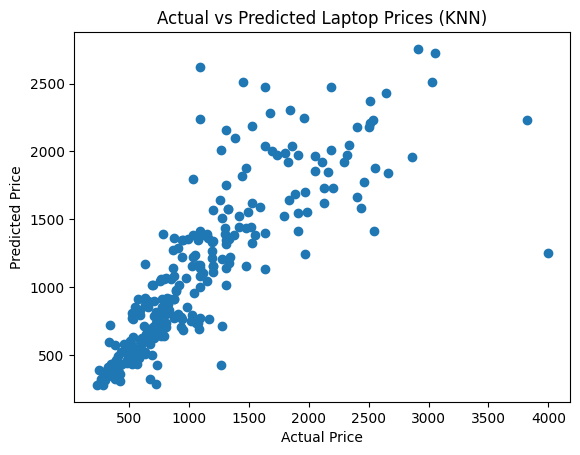

In [97]:
plt.scatter(y_test, knn.predict(X_test))
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted Laptop Prices (KNN)")
plt.show()

Now let's print out the MAE

In [98]:
print(f"Mean Absolute Error (MAE): {mean_absolute_error(y_test, knn.predict(X_test)):.2f}")

Mean Absolute Error (MAE): 234.70


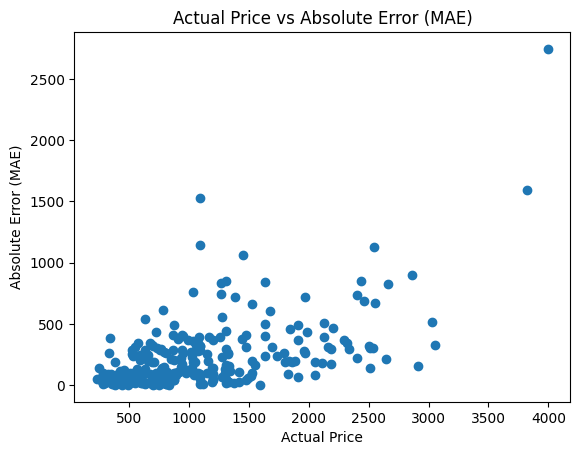

In [99]:
plt.scatter(y_test, abs(y_test - knn.predict(X_test)))
plt.xlabel("Actual Price")
plt.ylabel("Absolute Error (MAE)")
plt.title("Actual Price vs Absolute Error (MAE)")
plt.show()

Now let's do a decision tree

MAE: 211.65415779876557
MSE: 94135.09451565934
RMSE: 306.8144300968573
R² Score: 0.7914534247275423


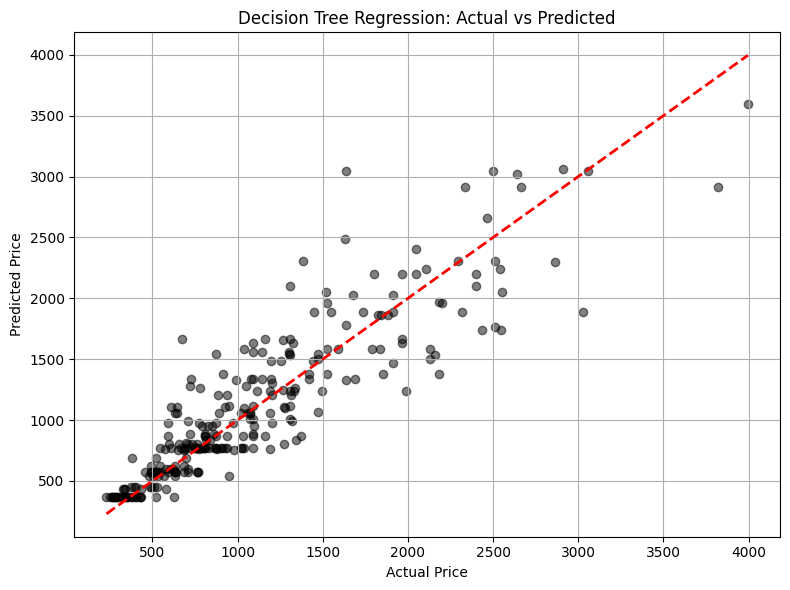

In [100]:
# this is our input features  list
X = data[['Ram_types','Cpu_Brands_Label','Gpu_Brands_Label','OperatingSys_label','Memory_GB','Weight','Company_Label','TypeName_Label','Inches']]
# output or target
y = data['Price_usd']

#Splitting the data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


#Training the data
from sklearn.tree import DecisionTreeRegressor

model = DecisionTreeRegressor(max_depth = 25,min_samples_leaf=5,max_leaf_nodes=92,random_state=42) # can add splitter = 'random' to reduce overfitting as well
model.fit(X_train, y_train)

#Evaluating using Rsquared Mae mse and rmse
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R² Score:", r2)


plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5, color='black')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', linewidth=2)  # Perfect prediction line
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Decision Tree Regression: Actual vs Predicted')
plt.grid(True)
plt.tight_layout()
plt.show()



Let's visualize our tree:

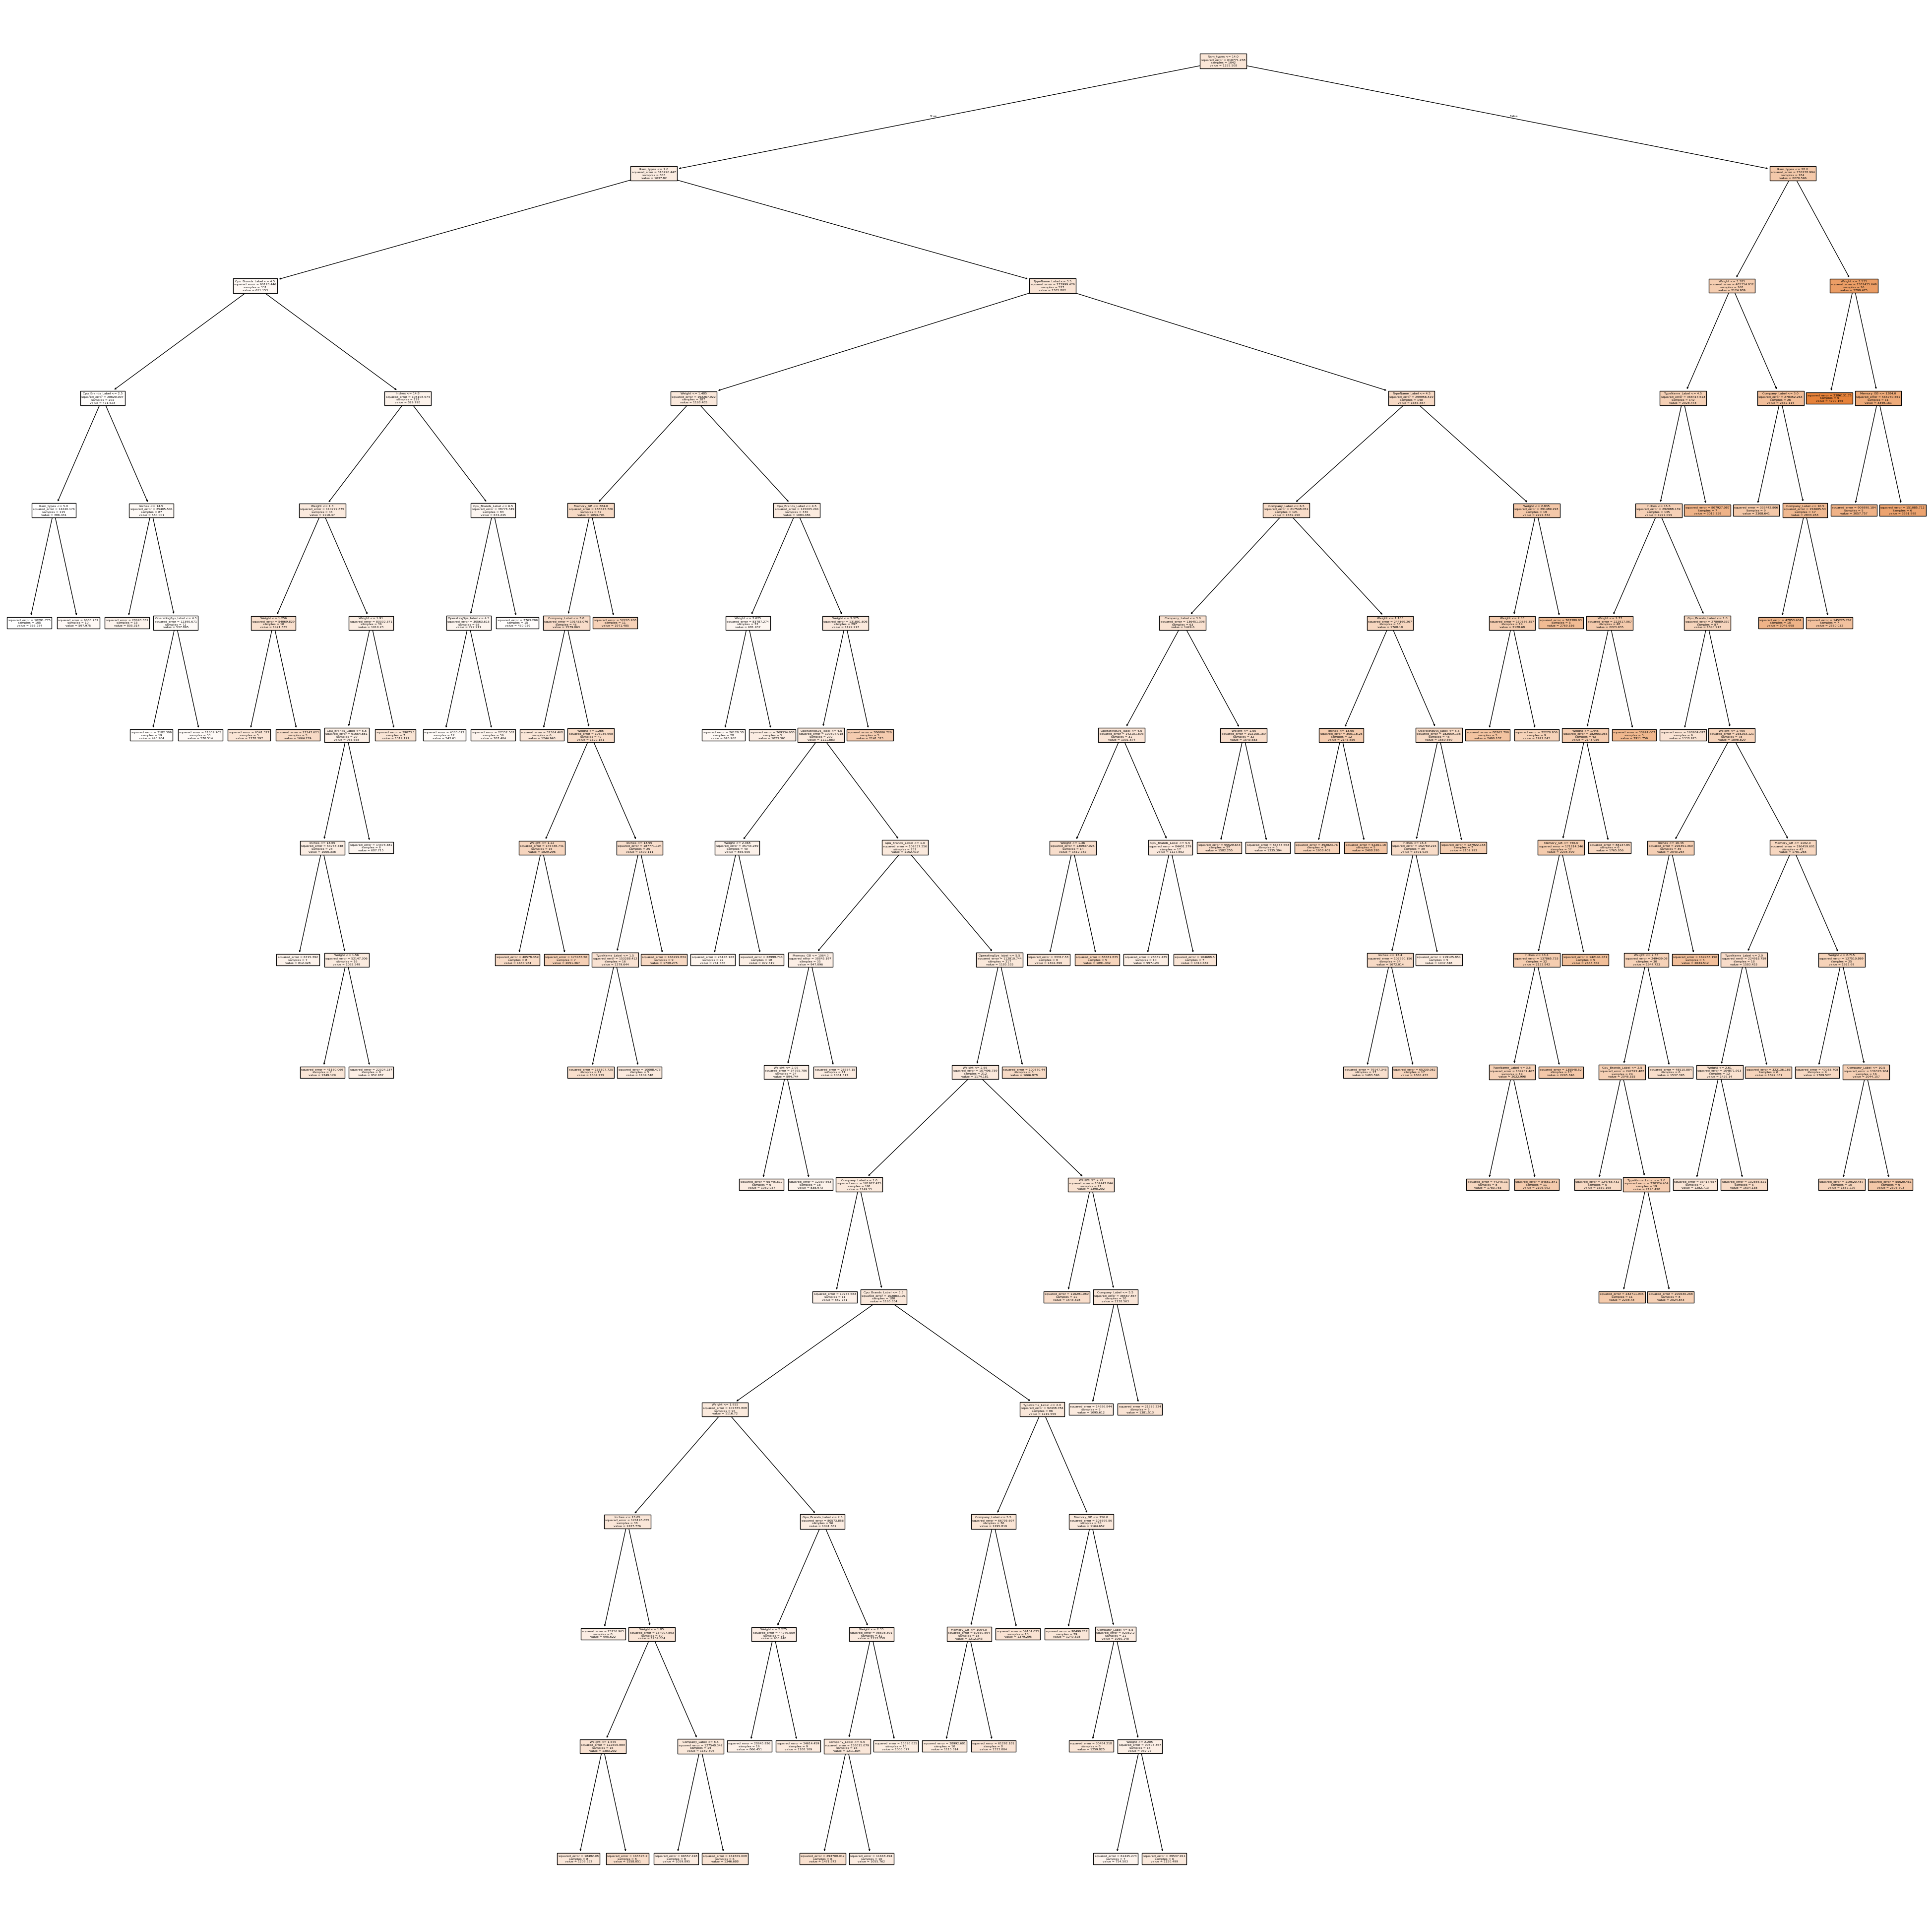

In [101]:
from sklearn import tree

plt.figure(figsize=(50,50))
tree.plot_tree(model,filled=True,feature_names=X.columns)
plt.show()


Forest Tree:

In [102]:
from sklearn.ensemble import RandomForestRegressor
forest = RandomForestRegressor(n_estimators = 20, random_state = 42, max_depth = 20, max_features = 2)
forest.fit(X_train, y_train)
forest_y_pred = forest.predict(X_test)
mae = mean_absolute_error(y_test, forest_y_pred)
print(f"R-squared score: {r2_score(y_test, raw_predicted):.2f}")
print(f"Mean Absolute Error (MAE): {mean_absolute_error(y_test, raw_predicted):.2f}")
print(f"Mean Squared Error (MSE): {mean_squared_error(y_test, raw_predicted):.2f}")
print(f"Root Mean Squared Error (RMSE): {root_mean_squared_error(y_test, raw_predicted):.2f}")

R-squared score: 0.69
Mean Absolute Error (MAE): 234.70
Mean Squared Error (MSE): 140036.33
Root Mean Squared Error (RMSE): 374.21


Make a bar graph of the four regressions in order to see which model performs the best.

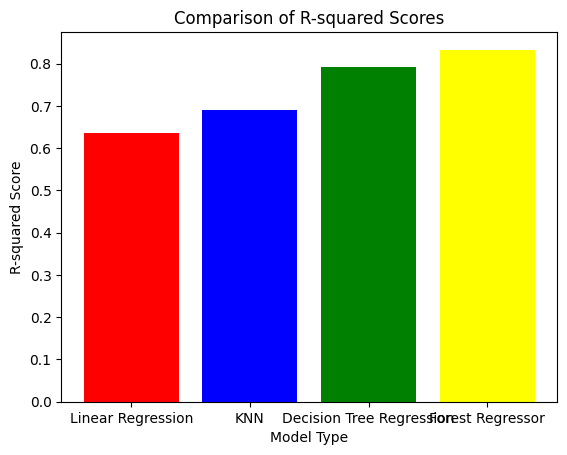

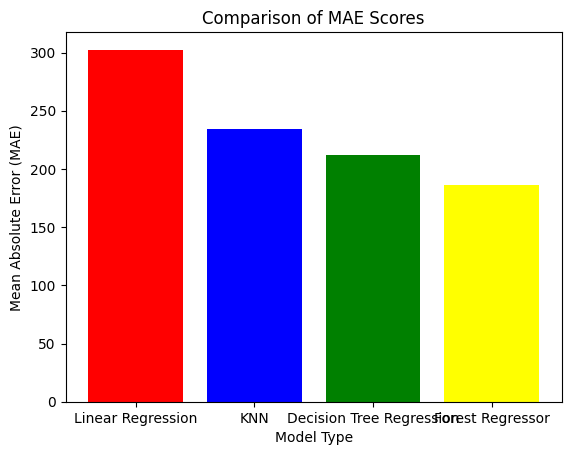

In [106]:
#This is the R squared score comparison
models = {"Linear Regression": model1, "KNN": knn, "Decision Tree Regression": model, "Forest Regressor": forest}
r2_scores = [r2_score(y_test, model.predict(X_test)) for model in models.values()]

plt.bar(models.keys(), r2_scores, color=["red", "blue", "green", "yellow"])
plt.xlabel("Model Type")
plt.ylabel("R-squared Score")
plt.title("Comparison of R-squared Scores")
plt.show()

#This is the MAE comparison
models = {"Linear Regression": model1, "KNN": knn, "Decision Tree Regression": model, "Forest Regressor": forest}
mae_scores = [mean_absolute_error(y_test, model.predict(X_test)) for model in models.values()]

plt.bar(models.keys(), mae_scores, color=["red", "blue", "green", "yellow"])
plt.xlabel("Model Type")
plt.ylabel("Mean Absolute Error (MAE)")
plt.title("Comparison of MAE Scores")
plt.show()